# package_DBR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

 # myRound()

In [ ]:
help(myRound)

In [ ]:
print(myRound(19.3,6))
print(myRound(21.5,6))

# SelectPath_RT()

In [ ]:
help(SelectPath_RT)

In [ ]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}
ManPath = {0: False, 5: False, 50: True, 80: False, TSim: False}

t = []
MV = []
Man = []

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    SelectPath_RT(ManPath,t,Man)    
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,Man,'skyblue',label='Man',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

print(Man[0:10])

# Delay_RT()

In [ ]:
help(Delay_RT)

In [ ]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []

# Parameters
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)    
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])   

# FO_RT()

In [ ]:
help(FO_RT)

In [ ]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
T = 5
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    FO_RT(MVDelay,Kp,T,Ts,PV_EBD)
    FO_RT(MVDelay,Kp,T,Ts,PV_EFD,0,'EFD')
    FO_RT(MVDelay,Kp,T,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='First order response plus delay (EFD)',where='post')
plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

# FOPDT()

In [ ]:
help(FOPDT)

In [ ]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []

# Parameters
Kp = 1
T = 5
theta = 10

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

# SOPDT()

In [ ]:
help(SOPDT)

In [ ]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []

# Parameters
Kp = 1.0
theta = 5.0
T1 = 5.0
T2 = 2.0

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PVFOPDT = FOPDT(MV,Kp,T1,theta,Ts)
PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.step(t,PVFOPDT,'springgreen',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

# FOPDT_cost() and identification of a FOPDT model

In [ ]:
help(FOPDT_cost)

In [ ]:
MVm = MV
PVm = PVFOPDT
# PVm = PVSOPDT

# Initial values
p0 = np.zeros(3)
p0[0] = 1.1 # K
p0[1] = 10.0 # T
p0[2] = 2.0 # theta

# Bounds on parameters
bnds = ((None, None), (0, None), (0, None))

cost = FOPDT_cost(p0,MVm,PVm,Ts)
print('Initial cost: ' + str(cost))

### Without visualisation

In [ ]:
solution = minimize(FOPDT_cost,p0,args=(MVm,PVm,Ts), method='Powell', bounds=bnds, options={'disp': True})
p = solution.x
print('Final SSE Objective: ' + str(FOPDT_cost(p,MVm,PVm,Ts)))

K = p[0]
T = p[1]
theta  = p[2]

print('K: ' + str(K))
print('T: ' + str(T))
print('theta: ' + str(theta))  

### With visualisation (slower)

In [ ]:
p0 = np.zeros(3)
p0[0] = 1.1 # K
p0[1] = 10.0 # T
p0[2] = 2.0 # theta

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
l1, = ax1.step([0,1],[0,1],'g-',linewidth=2,label='Experimental PV',where='post')
l2, = ax1.step([0,1],[0,1],'r-',linewidth=2,label='Estimated PV',where='post')
ax1.set_ylabel('Value of PV')
ax1.set_title('Identification of FOPDT model')
ax1.legend(loc='best')

solution = minimize(FOPDT_cost,p0,args=(MVm,PVm,Ts,(fig,ax1,l1,l2)), method='Powell', bounds=bnds)
p = solution.x
print('Final SSE Objective: ' + str(FOPDT_cost(p,MVm,PVm,Ts)))

K = p[0]
T = p[1]
theta  = p[2]

print('K: ' + str(K))
print('T: ' + str(T))
print('theta: ' + str(theta))   

# SOPDT_cost() and identification of a SOPDT model

In [ ]:
help(SOPDT_cost)

In [ ]:
MVm = MV
PVm = PVSOPDT

# Initial values
p0 = np.zeros(4)
p0[0] = 1.1 # K
p0[1] = 10.0 # T
p0[2] = 1.0 # T
p0[3] = 2.0 # theta

# Bounds on parameters
bnds = ((None, None), (0, None), (0, None), (0, None))

cost = SOPDT_cost(p0,MVm,PVm,Ts)
print('Initial cost: ' + str(cost))

### Without visualisation

In [ ]:
solution = minimize(SOPDT_cost,p0,args=(MVm,PVm,Ts), method='Powell', bounds=bnds, options={'disp': True})
p = solution.x
print('Final SSE Objective: ' + str(SOPDT_cost(p,MVm,PVm,Ts)))

K = p[0]
T1 = p[1]
T2 = p[2]
theta  = p[3]

print('K: ' + str(K))
print('T1: ' + str(T1))
print('T2: ' + str(T2))
print('theta: ' + str(theta))   

### With visualisation (slower)

In [ ]:
p0 = np.zeros(4)
p0[0] = 1.1 # K
p0[1] = 10.0 # T
p0[2] = 1.0 # T
p0[3] = 2.0 # theta

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
l1, = ax1.step([0,1],[0,1],'g-',linewidth=2,label='Experimental PV',where='post')
l2, = ax1.step([0,1],[0,1],'r-',linewidth=2,label='Estimated PV',where='post')
ax1.set_ylabel('Value of PV')
ax1.set_title('Identification of SOPDT model')
ax1.legend(loc='best')

solution = minimize(SOPDT_cost,p0,args=(MVm,PVm,Ts,(fig,ax1,l1,l2)), method='Powell', bounds=bnds)
p = solution.x
print('Final SSE Objective: ' + str(SOPDT_cost(p,MVm,PVm,Ts)))

K = p[0]
T1 = p[1]
T2 = p[2]
theta  = p[3]

print('K: ' + str(K))
print('T1: ' + str(T1))
print('T2: ' + str(T2))
print('theta: ' + str(theta))   

# Bode()

In [38]:
help(Bode)

Help on function Bode in module package_DBR:

Bode(P, omega, Show=True)
    :P: Process as defined by the class "Process".
        Use the following command to define the default process which is simply a unit gain process:
            P = Process({})
        
        A delay, two lead time constants and 2 lag constants can be added.
        
        Use the following commands for a SOPDT process:
            P.parameters['Kp'] = 1.1
            P.parameters['Tlag1'] = 10.0
            P.parameters['Tlag2'] = 2.0
            P.parameters['theta'] = 2.0
        
        Use the following commands for a unit gain Lead-lag process:
            P.parameters['Tlag1'] = 10.0        
            P.parameters['Tlead1'] = 15.0        
        
    :omega: frequency vector (rad/s); generated by a command of the type "omega = np.logspace(-2, 2, 10000)".
    :Show: boolean value (optional: default value = True). If Show = True, the Bode diagram is shown. Otherwise Ps (P(j omega)) (vector of comple

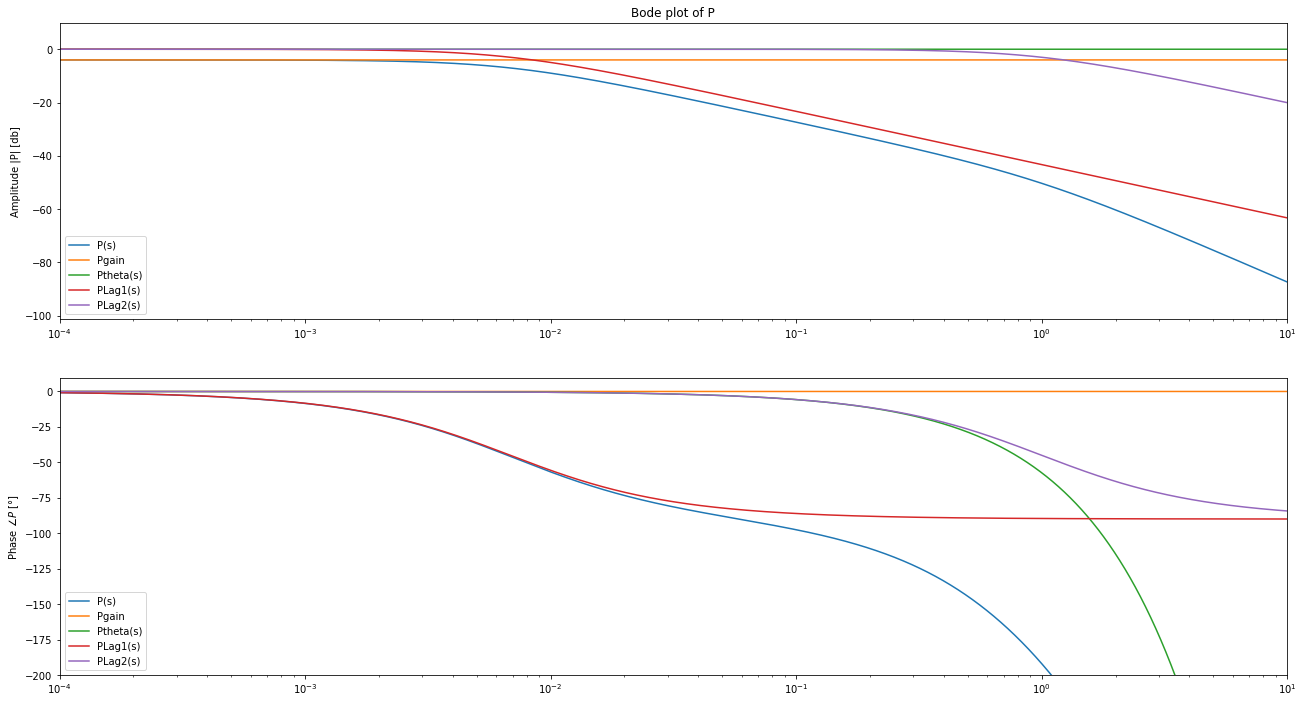

In [39]:
P = Process({}) # Default process = unit gain

# Parameters for input-output dynamics P(s)
P.parameters['Kp'] = 0.63
P.parameters['Tlag1'] = 146.0
P.parameters['Tlag2'] = 1.0
P.parameters['theta'] = 1.0

omega = np.logspace(-4, 1, 10000)

Bode(P,omega)

In [ ]:
Ps = Bode(P,omega,Show=False)